In [1]:
# import csv
# import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import stats
# import scipy.stats as ss
# from matplotlib import style
# from matplotlib.lines import Line2D
# # import lxml
# import html5lib
# # import beautifulsoup4 as bs4
# from matplotlib import gridspec
# # from matplotlib_venn import venn2, venn3, venn3_circles
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list, cophenet
# from scipy.spatial.distance import pdist
# #pretty display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

matplotlib.style.use('ggplot')
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.figsize'] = (7, 5)

# %config InlineBackend.figure_format = 'retina'
# # figure out number of indels

README:
    1. cervical clinical data: /projects/NCI/NCI_HIV_Cervical/clinical/nationwidechildrens.org_CESC.clinical.Level_2.0.11.HTMCP/nationwidechildrens.org_clinical_patient_cesc.txt
    2. spearman correlation for putative histology : /projects/NCI/NCI_HIV_Cervical/HTMCP-03-06-02377/plots/tcga/spearman/biop1_t_A78455/all/HTMCP-03-06-02377_A78455-minrpkm_0.2-LOGANOVA1744.png

# mutations

# DNA and RNA QC

In [183]:
f = '/home/szong/projects/QC/genome/HIV_Cervical/new_bamstats_summary.csv'
ddf = pd.read_csv(f, sep='\t',index_col=['patient', 'library'])

ddf.head(2)
ddf.shape


,,status,coverage,alignment_rate,duplicate_rate
patient,library,,,,
HTMCP-03-06-02001,A37234,malignant,91.3,91.6,2.2
HTMCP-03-06-02002,A37235,malignant,88.2,91.7,2.8


(208, 4)

In [178]:
ddf.columns


Index(['library', 'status', 'coverage', 'alignment_rate', 'duplicate_rate'], dtype='object')

In [181]:
categories

['normal', 'malignant']

status normal coverage 0
status malignant coverage 1
status normal alignment_rate 0
status malignant alignment_rate 1
status normal duplicate_rate 0
status malignant duplicate_rate 1


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


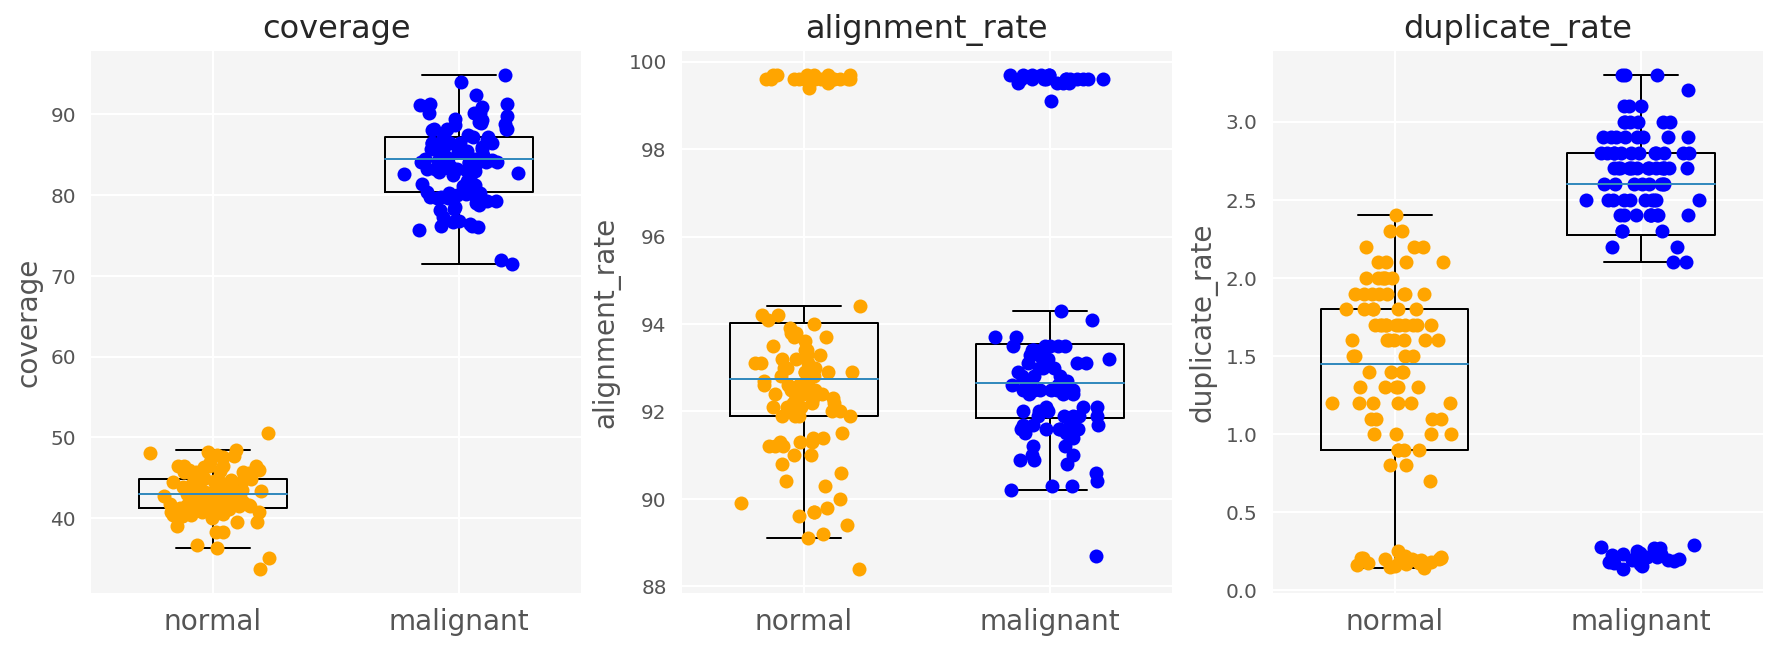

In [194]:
df = ddf.copy()
value_cols = [ 'coverage', 'alignment_rate','duplicate_rate']
titles = value_cols

# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/3.0), 3, figsize=(15, 5))
axes = axes.ravel()
group_col = 'status'
# tissue_col = 'status'

categories = sorted(df[group_col].unique().tolist(), reverse=True) 
# tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        print(group_col, cat, col, position)
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
            lb = '' if i == 0 else '{}'.format(tissue)
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=16)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel(col, fontsize=14)
    ax.grid(True)
#     _ = ax.legend(scatterpoints=1,
#               loc='upper left',
#               ncol=1,
#               fontsize=12)
plt.suptitle('', fontsize=14)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/genome_QC.png'
plt.savefig(of, dpi=200)

In [3]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171010.xls'
df = pd.read_excel(f, sheetname='meta_106', index_col='patient')
df.head(2)
df.shape

,DNA_lib,source,RNA_lib,strelka_snv_indel_total,log10_strelka_total,DNA_microbe_RPM,DNA_microbe_logRPM,combo,RNA_microbe_RPM,RNA_microbe_logRPM,...,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total_immune_cells,high_hiv_load,low_cd4_counts
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,A37234,HTMCP_124,A37700,26974,4.430945,3.322137,0.521418,Squamous_+,4056.790826,3.608183,...,0.1,519.9,1.9,4.5,4.2,2.6,26.2,535.3,low,>200
HTMCP-03-06-02002,A37235,HTMCP_125,A37701,16661,4.221701,0.058688,-1.231448,Squamous_-,135.435651,2.131733,...,0.5,336.6,6.8,2.4,8.1,1.4,7.5,363.7,low,>200


(106, 62)

In [67]:
df.columns

Index(['DNA_lib', 'source', 'RNA_lib', 'strelka_snv_indel_total',
       'log10_strelka_total', 'DNA_microbe_RPM', 'DNA_microbe_logRPM', 'combo',
       'RNA_microbe_RPM', 'RNA_microbe_logRPM', 'CCR5_rpkm', 'CXCR4_rpkm',
       'cd4_rpkm', 'CD8AB_rpkm', 'ribodepleted_lib', 'reanne_HIV_status',
       'HPV_status', 'histologic_diagnosis', 'reanne_Putative_histology',
       'birth_days_to', 'menopause_status', 'height_cm_at_diagnosis',
       'weight_kg_at_diagnosis', 'history_hormonal_contraceptives_use',
       'live_birth_pregnancy_count', 'total_pregnancy_count',
       'pregnancies_count_miscarriage', 'pregnancies_count_induced_abortion',
       'karnofsky_score', 'tobacco_smoking_history_indicator', 'ecog_score',
       'nadir_cd4_counts', 'cd4_counts_at_diagnosis',
       'hiv_rna_load_at_diagnosis', 'haart_therapy_prior_to_dx',
       'haart_therapy_at_dx', 'age_at_diagnosis',
       'keratinization_squamous_cell', 'tumor_grade', 'ajcc_tumor_clinical_ct',
       'clinical_stage'

In [5]:
ss.spearmanr(df[['log10_strelka_total', 'log_mut_pMHCs']].dropna())

SpearmanrResult(correlation=0.6912956469257272, pvalue=1.7032677290942074e-15)

In [72]:
ss.spearmanr(df.query('reanne_HIV_status=="Positive"')[['age_at_diagnosis', 'strelka_snv_indel_total']].dropna())

SpearmanrResult(correlation=-0.13069288493891246, pvalue=0.41537853309591588)

In [69]:
df.query('reanne_HIV_status=="Negative"')[['age_at_diagnosis', 'strelka_snv_indel_total']].dropna().corr(method='spearman', min_periods=1)#['history_hormonal_contraceptives_use'].value_counts()

,age_at_diagnosis,strelka_snv_indel_total
age_at_diagnosis,1.000000,0.266435
strelka_snv_indel_total,0.266435,1.000000


In [66]:
ss.spearmanr(df.query('reanne_HIV_status=="Positive"')[['hiv_rna_load_at_diagnosis', 'cd4_rpkm']].dropna())

SpearmanrResult(correlation=-0.21928030146059399, pvalue=0.16293740004095975)

In [80]:
# df = df[['age_at_diagnosis', 'strelka_snv_indel_total', 'reanne_HIV_status']].dropna()

In [99]:
df = df.query('reanne_HIV_status=="Negative"')

SpearmanrResult(correlation=0.26643518046495335, pvalue=0.096544380453955567)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


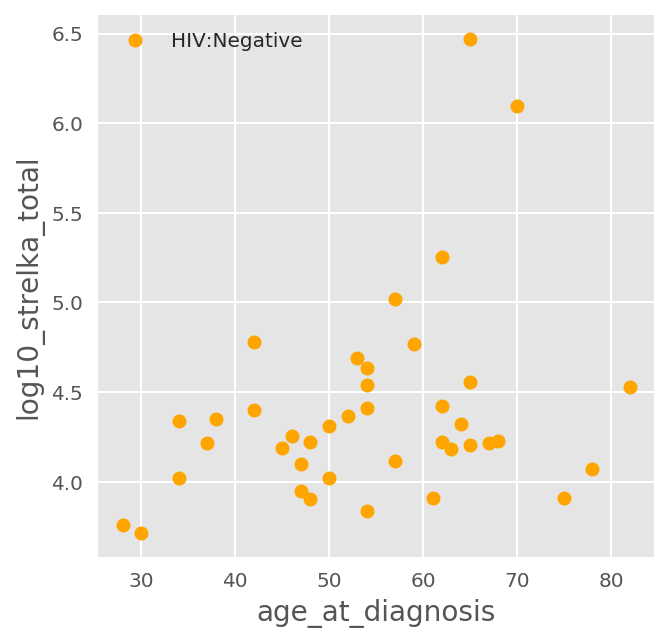

In [100]:
# *********************************************
# df1 = df.copy()
# *********************************************

# look at correlations between cd4 counts and hiv load and haart theraphy
# var1 = 'hiv_rna_load_at_diagnosis'
# var1 = 'num_mapped_reads'
var1 = 'age_at_diagnosis'
# var2 = 'TRAB_diversity'
# var2 = 'DNA_microbe_logRPM'
# var2 = 'TRAB_reads'
# var1 = 'total_immune_cells'
var2 = 'log10_strelka_total'
lgd = 'HIV'


# var2 = 'TRAB_reads'
# var2 = 'CCR5_rpkm'
# var2 = 'total_pregnancy_count'
# var2 = 'CXCR4_rpkm'
# clrcol = 'low_cd4_counts' #color by column
clrcol = 'reanne_HIV_status'
# clrcol = 'history_hormonal_contraceptives_use'
# clrcol = 'high_hiv_load'
# grpcol = 'reanne_HIV_status' 
# group_col = 'reanne_HIV_status'
# tissue_col = 'low_cd4_counts'

# *********************************
df1 = df[[var1] + [var2] + [clrcol]].dropna()
# df['log10_T_cells'] = np.log10(df['T cells'])
# *********************************

ss.spearmanr(df1[var1], df1[var2])
# df1 = df.query('{0}=="{1}"'.format(grpcol, "Positive" ))[[var1, var2, clrcol]].dropna()


clrs = sorted(df1[clrcol].unique().tolist(), reverse=True)
# grpcol = 'reanne_HIV_status' #group on x axis by this column
# grps = sorted(df1[grpcol].unique().tolist(), reverse=True)

colors = ["orange","blue","yellow", "black"]



fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
# df2 = df1.query('{0}=="{1}"'.format(grpcol, "Positive" ))[[var1, var2, clrcol]].dropna()


np.random.seed(0)

for j, ctgr in enumerate(clrs):
    x = df1.query('{0}=="{1}"'.format(clrcol, ctgr))[var1]
    # add jitter, this distort plot a bit, be aware
#     jitter = np.random.normal(0.2, 0.2, size=len(x))

    y = df1.query('{0}=="{1}"'.format(clrcol, ctgr))[var2]
#     _ = ax.plot(np.log10(x), np.log10(y), mfc = colors[j], mec='k', 
    _ = ax.plot(x, y, mfc = colors[j], mec='k', 
                ms=7, marker="o", linestyle="None", 
                label='{0}:{1}'.format(lgd, ctgr))
#     _= ax.set_xlabel('{0}({1})'.format(var1, 'log10'), fontsize=14)
#     _= ax.set_ylabel('{0}({1})'.format(var2, 'log10'), fontsize=14)
    _= ax.set_xlabel('{0}'.format(var1), fontsize=14)
    _= ax.set_ylabel('{0}'.format(var2), fontsize=14)
#     _=ax.set_xlim(0,200)
ax.legend()


of = '/projects/trans_scratch/validations/workspace/szong/Cervical/age_mutation_load_correlation_HIV_negative.png'
plt.savefig(of, dpi=200)

Positive -0.00241030745077 4.24529754492


Negative 0.0135498823819 3.65244963537


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


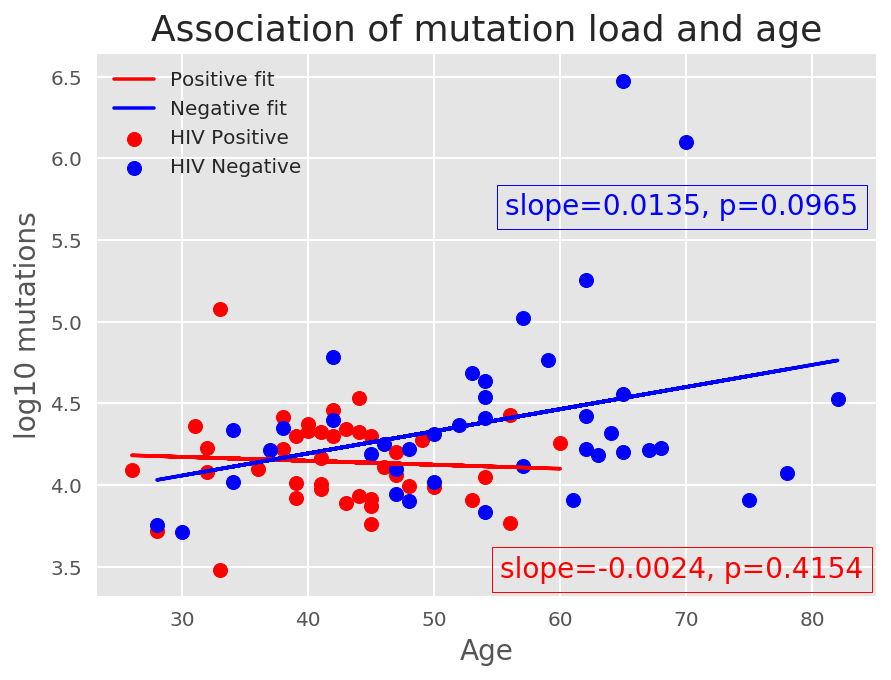

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)
clrs = ['red', 'blue']
for k, i in enumerate(['Positive', 'Negative']):
    df1 = df.query('reanne_HIV_status=="{}"'.format(i))[['age_at_diagnosis', 'log10_strelka_total', 'reanne_HIV_status']].dropna()
    ax.scatter( df1.age_at_diagnosis, df1.log10_strelka_total, label='HIV {}'.format(i), c=clrs[k])
    fit = np.polyfit(  df1.age_at_diagnosis,df1.log10_strelka_total,1)
    print(i, fit[0], fit[1])
    
    cor, p = ss.spearmanr(df1.age_at_diagnosis, df1.log10_strelka_total)
    cor = "{0:.4f}".format(round(cor, 3))
    p = "{0:.4f}".format(round(p, 4))
    ax.plot(df1.age_at_diagnosis, fit[0]*df1.age_at_diagnosis + fit[1], '-', label='{} fit'.format(i), c=clrs[k])
    _ = ax.text(0.75, 0.05+k/1.5,'slope={0}, p={1}'.format(round(fit[0],4), p), ha='center', va='center', 
                transform=ax.transAxes, size=14, color=clrs[k], bbox=dict(facecolor='none', edgecolor=clrs[k]))
    
    plt.title('Association of mutation load and age', fontsize=18)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('log10 mutations',fontsize=14)
    ax.legend() 
of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/association_age_mutation_load.png'
plt.savefig(of1, dpi=200)

In [127]:
ax.text?

In [25]:
cols = [ 'strelka_snv_indel_total',
        'DNA_microbe_RPM', 
       
        'CCR5_rpkm', 'CXCR4_rpkm',
       'cd4_rpkm', 'CD8AB_rpkm', 
               'age_at_diagnosis',
        'mut_pMHCs',
       'mutation_MHCs',   
        'TRAB_reads',
       'TRAB_diversity',
       'total_immune_cells']

aa = [ 'T cells', 'CD8 T cells', 'Cytotoxic lymphocytes',
       'NK cells', 'B lineage', 'Monocytic lineage', 'Myeloid dendritic cells',
       'Neutrophils', 'Endothelial cells', 'Fibroblasts',]

cols = ['mut_pMHCs',
       'mutation_MHCs', 'TRAB_reads',
       'TRAB_diversity','T cells', 'CD8 T cells', 'Cytotoxic lymphocytes',
       'NK cells', 'B lineage', 'Monocytic lineage', 'Myeloid dendritic cells',
       'Neutrophils', 'Endothelial cells', 'Fibroblasts','total_immune_cells']

In [26]:
# correlations between variables
df[cols].corr(method='spearman', min_periods=1)

,mut_pMHCs,mutation_MHCs,TRAB_reads,TRAB_diversity,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total_immune_cells
mut_pMHCs,1.000000,0.942828,0.052208,0.062448,0.103468,-0.001706,0.013193,0.133482,0.089939,-0.052112,-0.060519,-0.041310,0.033430,0.020036,0.080770
mutation_MHCs,0.942828,1.000000,0.121724,0.122134,0.155765,0.052595,0.040376,0.157787,0.113988,-0.004988,0.034478,-0.033024,0.012923,0.017194,0.105424
TRAB_reads,0.052208,0.121724,1.000000,0.972132,0.508457,0.667861,0.616778,0.592243,0.597718,0.496213,0.557989,-0.176363,-0.068040,0.042333,0.607409
TRAB_diversity,0.062448,0.122134,0.972132,1.000000,0.545622,0.638071,0.570442,0.607614,0.659546,0.474166,0.576414,-0.176887,-0.042902,0.082267,0.667755
T cells,0.103468,0.155765,0.508457,0.545622,1.000000,0.356653,0.299275,0.564507,0.450146,0.244848,0.441307,-0.136071,-0.141217,-0.050064,0.467542
CD8 T cells,-0.001706,0.052595,0.667861,0.638071,0.356653,1.000000,0.731556,0.467061,0.466074,0.155653,0.364013,-0.250872,0.125309,0.175678,0.477457
Cytotoxic lymphocytes,0.013193,0.040376,0.616778,0.570442,0.299275,0.731556,1.000000,0.547220,0.474707,0.394288,0.308848,-0.055683,0.117249,0.169966,0.487684
NK cells,0.133482,0.157787,0.592243,0.607614,0.564507,0.467061,0.547220,1.000000,0.547019,0.396145,0.410109,0.072059,0.013934,0.066020,0.556513
B lineage,0.089939,0.113988,0.597718,0.659546,0.450146,0.466074,0.474707,0.547019,1.000000,0.207683,0.484579,-0.168459,0.074172,0.209866,0.998728
Monocytic lineage,-0.052112,-0.004988,0.496213,0.474166,0.244848,0.155653,0.394288,0.396145,0.207683,1.000000,0.299338,0.197221,0.055906,0.096931,0.218569


# immune cells

In [43]:
df.shape

(100, 5)

0 0 is 0.17455101804219778
0 1 is 0.11832135161289614
1 0 is 2.208565936178393
1 1 is 2.743082049146189
2 0 is 7.966374471357169
2 1 is 15.042265722615578


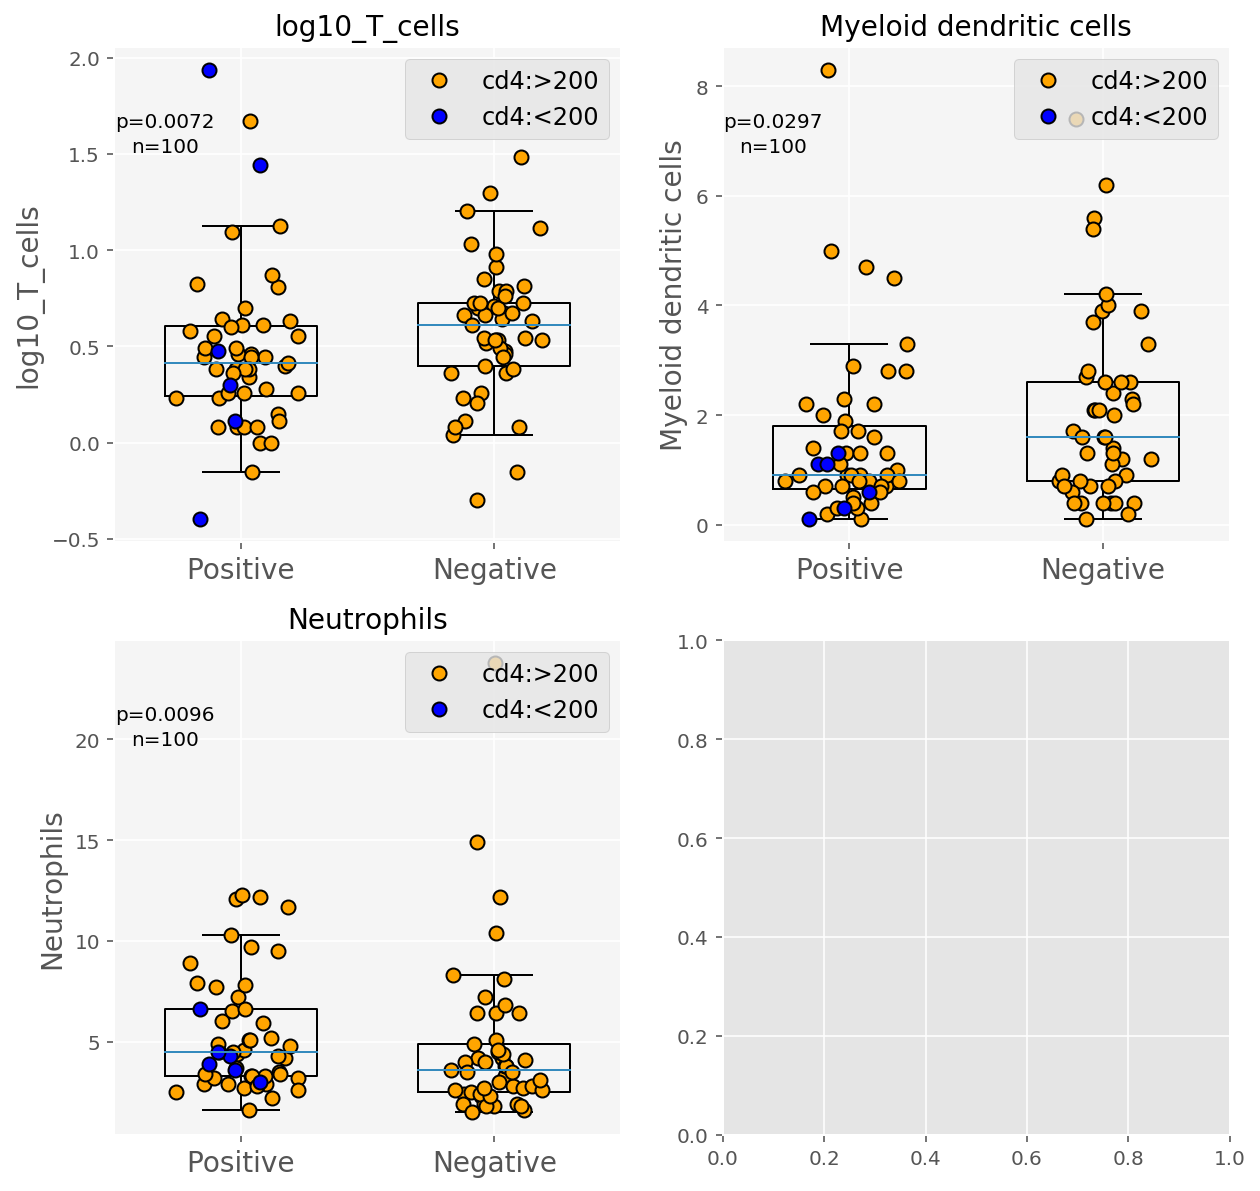

In [48]:
# value_cols = [ 'diversity','diversity_per_kilo_TR_reads']
# value_cols = ['nc_diversity', 'mean_insert_size']
# titles = ['transcriptome', 'Transcriptome']
# df = df6.copy()
# value_cols = ['cd4_rpkm']
value_cols = [ 'log10_T_cells', 
       'Myeloid dendritic cells',
       'Neutrophils']
titles = value_cols

# boxplot overlaps individual data point
# m = len(value_cols)
# rw = int(len(value_cols)/2.0

fig, axes = plt.subplots(round(len(value_cols)/2.0), 2, figsize=(10, 10))
axes = axes.ravel()
# group_col = 'combo'
group_col = 'reanne_HIV_status'
tissue_col = 'low_cd4_counts'
# tissue_col = 'hiv_load'
# tissue_col = 'cd4_count'
# tissue_col = 'reanne_Putative_histology'

# df = df[value_cols + [group_col] + [tissue_col]].dropna()
# df['log10_T_cells'] = np.log10(df['T cells'])
 
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
#             lb = '' if i == 0 else tissue
            lb = '' if i == 0 else '{0}:{1}'.format('cd4', tissue)
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
#         show the unequal variance of each group, not equal
        print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
    # statistical test for 1st grp, normally distributed, t test is used
    stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p_U = round(p_U, 4)
    _ = ax.text(0.1, 0.85,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=10) 
    _ = ax.text(0.1, 0.80,'n={}'.format(100), ha='center', va='center', transform=ax.transAxes, size=10) 

#     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
#     p_T = round(p_T, 4)
#     print(col, p_T)
#     _ = ax.text(0.5, 0.90,'p={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=14)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel(col, fontsize=14)
    ax.grid(True)
    _ = ax.legend(scatterpoints=1,
              loc='upper right',
              ncol=1,
              fontsize=12)
plt.suptitle('', fontsize=14)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/mcp_cells.png'
plt.savefig(of, dpi=200)

# mutations: snvs and indels

In [35]:
# fixed histology
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171010.xls'
snvdf = pd.read_excel(f, sheetname='snvs', parse_cols="A, F") # excel column name, but not header name
snvdf.head(2)
indeldf = pd.read_excel(f, sheetname='indels', parse_cols="A, F")
indeldf.head(2)

,gene,patient_ID
0,TACR1,HTMCP-03-06-02026
1,TACR1,HTMCP-03-06-02026


,gene,patient_ID
0,ZNF434,HTMCP-03-06-02109
1,IFFO1,HTMCP-03-06-02098


In [42]:
snv = snvdf.groupby('gene')['patient_ID'].nunique().to_frame()
snv.head(2)

,patient_ID
gene,
A1BG,1
A1CF,3


In [43]:
indel = indeldf.groupby('gene')['patient_ID'].nunique().to_frame()
indel.head(2)

,patient_ID
gene,
ABCA9,1
ABCB5,1


In [44]:
dfm = pd.merge(snv, indel, left_index=True, right_index=True, how='outer').fillna(0).astype(int)

In [45]:
dfm['total'] = dfm.sum(axis=1)
dfm.head()

,patient_ID_x,patient_ID_y,total
gene,,,
A1BG,1,0,1
A1CF,3,0,3
A2LD1,2,0,2
A2M,6,0,6
A2ML1,3,0,3


In [49]:
dfm = dfm.sort_values('total', ascending=False). rename(columns={'patient_ID_x': 'snvs', 'patient_ID_y': 'indels'})

In [50]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutaion_frequency.csv'
dfm.to_csv(of)